<div style="color:white;
            text-align:center;
           border-radius:10px;
           background-color:#5642C5;
           font-size:50px;
            margin-bottom:30px;"> Preface
</div>

<img style="margin: auto;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/1C_Company_logo.svg/220px-1C_Company_logo.svg.png"/>

<p style="text-align:center;
          padding-top: 1em;
          font-size:20px;">Welcome to my notebook, in this notebook we will examine the current data from 1C Company. I am so happy to seeing you there. <br/> Our Objectives Are: w.r.t.</p>
          <ul style="font-size:20px;">
<li>Understanding the data</li>
<li>Cleaning the data</li>
<li>Analyzing the data</li>
<li>Visualizing the data</li>
<li>Making the final assessment</li>



<h1 style="color:red;
           margin:0;
           padding:0;">Import Relevant Libraries</h1>
  
<p style="font-size:20px">We will start with importing our libraries as we always do.</p>
    
<p style="font-size:20px">Then we will import our competition data.</p>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
categories_df = pd.read_csv('../input/competitive-data-science-predict-future-sales/item_categories.csv')
items_df = pd.read_csv('../input/competitive-data-science-predict-future-sales/items.csv')
sales_train_df = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
shops_df = pd.read_csv('../input/competitive-data-science-predict-future-sales/shops.csv')

<h1>Importings are done, let's understand our labeling before move on:</h1>

<h1>Data fields</h1>

**ID** - an Id that represents a (Shop, Item) tuple within the test set

**shop_id** - unique identifier of a shop

**item_id** - unique identifier of a product

**item_category_id** - unique identifier of item category

**item_cnt_day** - number of products sold. You are predicting a monthly amount of this measure

**item_price** - current price of an item

**date** - date in format dd/mm/yyyy

**date_block_num** - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

**item_name** - name of item

**shop_name** - name of shop

**item_category_name** - name of item category

*This dataset is permitted to be used for any purpose, including commercial use.*

> Let's start with sales_train.csv

In [3]:
sales_train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


<h1>Data Cleaning</h1>
<p style="font-size:20px">Let's check if there are missing values </p>

In [4]:
if sales_train_df.isnull().values.any():
    print("sales_train_df contains NaN values.")
else:
    print("sales_train_df doesn't contain any of NaN values.")
if shops_df.isnull().values.any():
    print("shops_df contains NaN values.")
else:
    print("shops_df doesn't contain any of NaN values.")
if items_df.isnull().values.any():
    print("items_df contains NaN values.")
else:
    print("items_df doesn't contain any of NaN values.")
if categories_df.isnull().values.any():
    print("categories_df contains NaN values.")
else:
    print("categories_df doesn't contain any of NaN values.")

sales_train_df doesn't contain any of NaN values.
shops_df doesn't contain any of NaN values.
items_df doesn't contain any of NaN values.
categories_df doesn't contain any of NaN values.


* Nice, we don't have any missing values.
<p style="font-size:20px;">Alright, probably our most important file is the sales_train.csv, I will check the correlation between months and sales. Maybe we can come up with new inferences.</p>

<AxesSubplot:xlabel='date'>

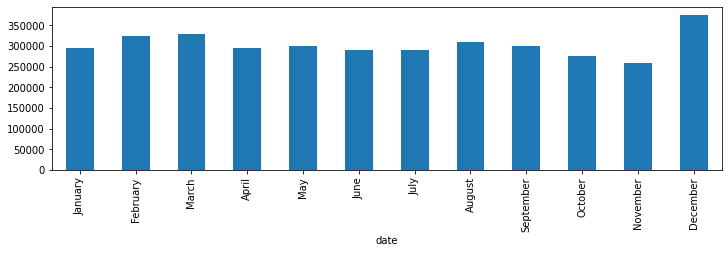

In [5]:
sales_train_df['date'] = pd.to_datetime(sales_train_df['date']) # formatting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_per_month = sales_train_df.groupby(sales_train_df['date'].dt.strftime('%B'))['item_cnt_day'].sum() # group sold item count with months
sales_per_month = sales_per_month.reindex(months_order, axis=0)
sales_per_month.plot(kind="bar", figsize=(12,3)) # plot it

<p style="font-size:20px;">It seems like <b>November</b> is the worst for sales so far, and <b>December</b> is the best for the sales, now let's dive deeper and inspect it by days</p>

<AxesSubplot:xlabel='day_of_week'>

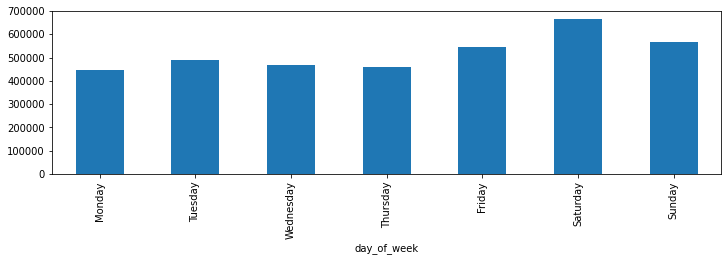

In [6]:
sales_train_df['day_of_week'] = sales_train_df['date'].dt.day_name() # add a new label that specifies a day in the week.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_per_day = sales_train_df.groupby(sales_train_df['day_of_week'])['item_cnt_day'].sum()
sales_per_day = sales_per_day.reindex(days_order, axis=0 )
sales_per_day.plot(kind='bar', figsize=(12,3))

<p style="font-size:20px;"><b>Saturday</b> is a great day for sales, but not <b>Thursday</b> neither <b>Monday</b>.</p>

**Now we can analyze it by months, host provided date block numbers, I appreciate it.**

Text(0, 0.5, 'Sales')

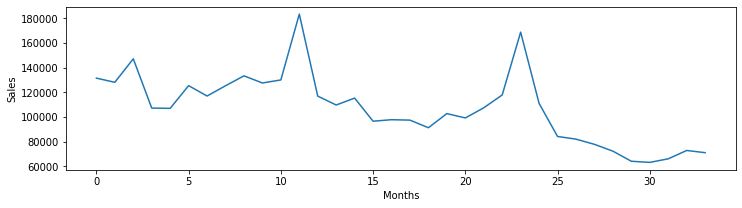

In [7]:
sales_per_month = sales_train_df.groupby(["date_block_num"])["item_cnt_day"].sum()
ax = sales_per_month.plot(kind='line', figsize=(12,3))
ax.set_xlabel("Months")
ax.set_ylabel("Sales")

<p style="font-size:20px;">Sales per months data seems <b>volatile</b>, a lot of factors can has an effect on it. <br>Examples: business policies, decisions,macroeconomics, seasonal sales, shortages etc.</p>

<p style="font-size:20px;">We will check other important factor, <b>Shops</b></p>

<p style="font-size:15px;">It looks like the company has so many shops around, some of them may be more strategic and performant while others are not so fruitful. </p>

Text(0, 0.5, 'Sales')

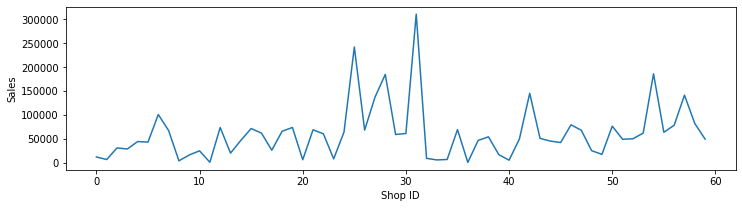

In [8]:
sales_per_shop = sales_train_df.groupby(["shop_id"])["item_cnt_day"].sum()
ax = sales_per_shop.plot(kind='line', figsize=(12,3))
ax.set_xlabel("Shop ID")
ax.set_ylabel("Sales")

<p style="font-size:20px;">Performance between shops differ a lot.</p>
<p style="font-size:15px;">Let's find best 3 shops and worst 3 of them, which will be more strategic. But there may be differen factors for <b>The Cost of a shop</b>: location, staff quantity, monthly costs per shops etc. </p>
<p style="font-size:15px;">Business eventually expects better performance for highly invested shops, unfortunately we don't have enough data to assess it, so we will stay as superficial.</p>

In [9]:
for i in sales_per_shop.nsmallest(3):
    print(f"Shop ID {sales_per_shop[sales_per_shop == i].index[0]} has a low performance with {i} products sold.")
print("-"*32)
for i in sales_per_shop.nlargest(3):
    print(f"Shop ID {sales_per_shop[sales_per_shop == i].index[0]} has a high performance with {i} products sold.")

Shop ID 36 has a low performance with 330.0 products sold.
Shop ID 11 has a low performance with 572.0 products sold.
Shop ID 8 has a low performance with 3595.0 products sold.
--------------------------------
Shop ID 31 has a high performance with 310777.0 products sold.
Shop ID 25 has a high performance with 241920.0 products sold.
Shop ID 54 has a high performance with 185790.0 products sold.


<p style="font-size:20px;">Shop id 36, 11, 8 have the lowest sales while Shop id 31, 25, 54 have the highest.</p> <p style="font-size:15px;"> But we can't directly come up with a solution, because there are so many factors involve in.</p>

<p style="font-size:20px;">We analyzed sales_train.csv and made some inferences, now we will target items.</p>

In [10]:
display(categories_df)
items_df

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


<p style="font-size:25px;">There are two files of items, we will merge them in order the ease our analysis.</p>

In [11]:
items_df = pd.merge(items_df, categories_df, on="item_category_id")
items_df

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания


<p style="font-size:20px;">Our items data is ready, we will start analyzing it and making inferences..</p>

In [12]:
print(items_df.groupby(['item_category_id']).count())
print(items_df.groupby(['item_id']).count())

                  item_name  item_id  item_category_name
item_category_id                                        
0                         4        4                   4
1                         2        2                   2
2                        75       75                  75
3                        34       34                  34
4                        15       15                  15
...                     ...      ...                 ...
79                        1        1                   1
80                        6        6                   6
81                        7        7                   7
82                        8        8                   8
83                       15       15                  15

[84 rows x 3 columns]
         item_name  item_category_id  item_category_name
item_id                                                 
0                1                 1                   1
1                1                 1                   1
2       

<p style="font-size:20px;">Our data contains <b>84</b> different categories and <b>22170</b> different items.</p>
<p style="font-size:15px;">Let's find most and least populated categories of items</p>

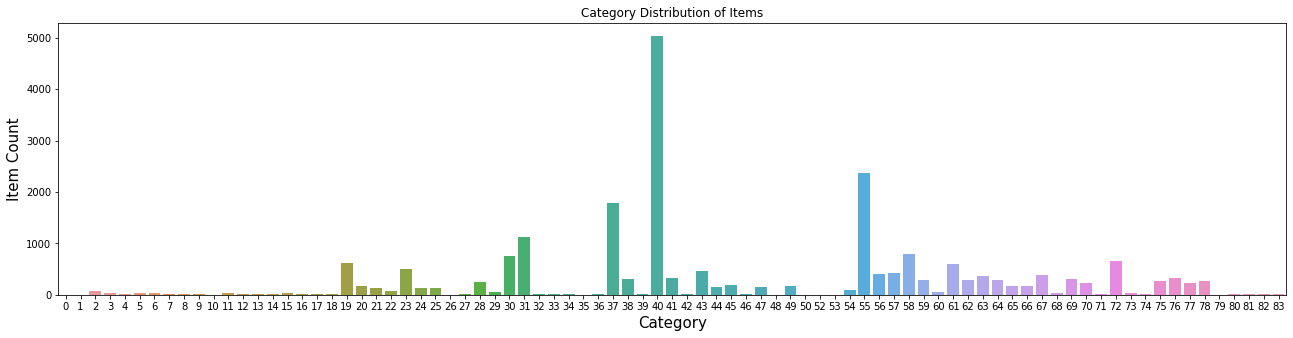

In [13]:
categories=items_df.groupby(['item_category_id']).count()
categories=categories.sort_values(by='item_id',ascending=False)
categories=categories.iloc[0:-1].reset_index()
plt.figure(figsize=(22,5))
ax= sns.barplot(x = categories.item_category_id, y = categories.item_id)

plt.title("Category Distribution of Items")
plt.ylabel('Item Count', fontsize=15)
plt.xlabel('Category', fontsize=15)
plt.show()

<p style="font-size:20px;">Apparently, category <b>40</b> with DVD has the largest cut in categories while most of them are relatively small.</p>

<h1>Final Assessment</h1>
<p style="font-size:25px">We analyzed our valid data, we created graphs, plots etc. Now it comes to our final assesment. Data is not detailed enough for a deep inference, but we can still have a valid opinion about our past observations:</p>
<ul style="font-size:20px; margin:1em;"><li>Sales don't change so much depending on different month periods. </li>
<li>Some of days have much more sale rates, but it doesn't vary a lot.</li>
<li>Sales are relatively seasonal, in the first few months sales peaked, then it is in a declining phase.</li>
<li>There is a high variance between shops, some of them with really good sale counts while others remain stagnant.</li>
<li>There are so many Item categories but only few of them dominates the item inventory in general.</li>
<li>It is not possible to have a very accurate prediction without more extensive data.</li></ul>

<h1> I thank them for hosting this competition, have a good day.</h1>